In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from collections import Counter

import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin

#The M3 methods
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neural_network import MLPClassifier as MLPC
from sklearn.neighbors import KNeighborsClassifier as KNN
import tensorflow as tf
from tensorflow.keras import models, layers
from keras.optimizers import SGD



from mlxtend.preprocessing import MeanCenterer

import seaborn as sns

from DT_Implement_pre_testing import DecisionTree

In [2]:
#Data load
test_data_filepath = '..\\fashion_test.npy'
train_data_filepath = '..\\fashion_train.npy'
fashion_train = np.load(train_data_filepath)
#fashion_test = np.load(test_data_filepath)

# Exploratory Data Analysis

In [3]:
#Class definitions
def tell_class(x):
    class_here = 'Error'
    if x == 0:
        class_here = '0 T-shirt/top'
    elif x == 1:
        class_here = '1 Trouser'
    elif x == 2:
        class_here = '2 Pullover'
    elif x == 3:
        class_here = '3 Dress'
    elif x == 4:
        class_here = '4 Shirt'

    return(f"Class: {class_here}")

In [4]:
def seperate_image_class(data_point_number):

    combined_array = fashion_train[data_point_number]
    
    array_of_the_image = combined_array[:-1]

    classification_of_the_image = combined_array[-1]

    class_of_the_image = tell_class(classification_of_the_image)


    return array_of_the_image, class_of_the_image


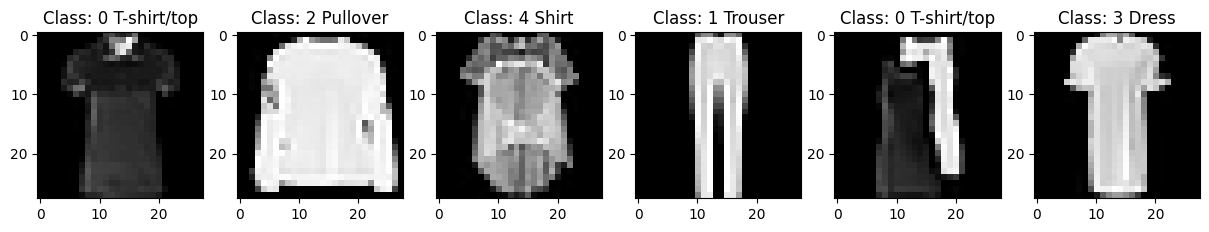

In [5]:
#Plot some images with their given class
image_choices = [100, 4511, 200, 300, 444, 500]

image_shape = (28, 28)

fig, axs = plt.subplots(1, len(image_choices), figsize=(15, 3))

n = 0

for image in image_choices:

        this_image_info = seperate_image_class(image)

        axs[n].imshow(this_image_info[0].reshape(image_shape), cmap='gray')
        axs[n].set_title(f"{this_image_info[1]}")

        n +=1

# Plot a frequency histogram of the classes to visualise the spread of classes

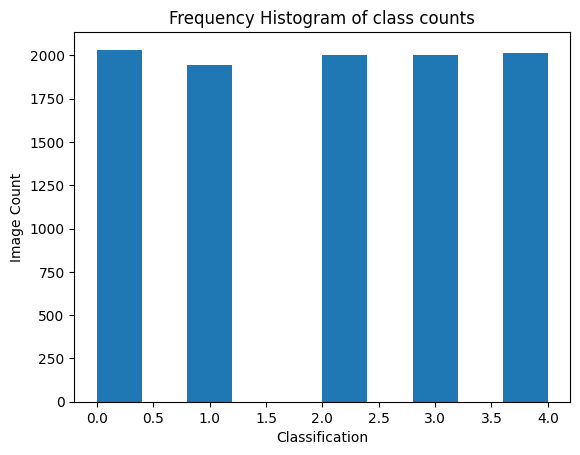

In [6]:
#Plot a frequency histogram of the classes to visualise the spread of classes

all_of_the_classes = []

for array in fashion_train:
    all_of_the_classes.append(array[-1]) #takes the classification value off the end of each datapoint

array_of_the_classes = np.array(all_of_the_classes)

plt.hist(all_of_the_classes)
plt.xlabel("Classification")
plt.ylabel("Image Count")
plt.title("Frequency Histogram of class counts")
plt.show()

#Have code for the grayscale sum, could add here?
#for feature scaling we won't use it, but could be good to appendix/talk about

# Calculate the representation ratios of each class within the 10,000 imagess training dataset 

In [7]:
array_of_the_classes

class_counts = Counter(array_of_the_classes)

print(class_counts)

counts = []

probabilities = []

class_representations = [0,1,2,3,4]

for class_ in class_representations:
    counts.append(class_counts[class_])

print(counts)

for class_ in class_representations:
    probabilities.append(counts[class_]/sum(counts))

print(probabilities)


Counter({0: 2033, 4: 2014, 3: 2005, 2: 2001, 1: 1947})
[2033, 1947, 2001, 2005, 2014]
[0.2033, 0.1947, 0.2001, 0.2005, 0.2014]


# Principal Component Analysis

In [8]:
all_of_the_images = []

for array in fashion_train:
    all_of_the_images.append(array[:-1]) #similarly to before, takes just the image data from each data point

array_of_all_images = np.array(all_of_the_images)

# Train/Validate split

In [9]:
X_train, X_validate, y_train, y_validate = train_test_split(array_of_all_images, array_of_the_classes , test_size = 0.2, random_state = 43, stratify = array_of_the_classes) #I'm hoping that the stratify parameter keeps the balance of classes in the two splits

a=len(X_train)
b=len(X_validate)

print(f'Train size {a} Validate size {b}')

Train size 8000 Validate size 2000


# Perform the PCA

In [10]:
pca = PCA()

# With sklearn PCA, it automatically centers the data
pca.fit(X_train)

# Eigenvalues, PC scores and variance explained
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_ * 100
scores = pca.transform(X_train)

#print("Eigenvalues:", eigenvalues)
#print('Eigenvectors: ', eigenvectors)

In [11]:
eigenvectors[0]

array([ 1.17728806e-06,  6.33056144e-06,  2.95166994e-05,  8.04312163e-05,
        1.38326108e-04,  4.65869364e-04,  7.19715576e-04,  1.91828487e-03,
        4.37949486e-03,  4.86643917e-03, -4.53796277e-03, -5.77064405e-03,
       -3.44983730e-03, -2.53712253e-03, -1.76263284e-03, -2.43879876e-03,
       -2.49259187e-03, -4.47451327e-03, -3.94863976e-03,  3.33111794e-03,
        1.86506766e-03,  8.51555165e-04,  3.73774610e-04,  2.07108992e-04,
        1.31878147e-04,  3.87484405e-05,  4.39688265e-06,  2.54151873e-06,
        2.48233706e-06,  3.72509750e-06,  6.16382818e-05,  3.30416339e-04,
        6.21682954e-04,  2.27399487e-03,  8.57602853e-03,  2.21091020e-02,
        3.48103351e-02,  3.53774340e-02,  1.57873641e-02,  1.46116148e-02,
        1.39722699e-02,  7.80057412e-03,  5.96333968e-03,  1.21415619e-02,
        1.58781127e-02,  1.58200760e-02,  2.03121077e-02,  3.31483340e-02,
        2.71310444e-02,  1.27753065e-02,  3.44950662e-03,  9.76651054e-04,
        5.11248341e-04,  

In [12]:
print("\nPercentage of variance explained by each PC:")
for i, variance in enumerate(explained_variance_ratio):
    print(f'PC {i+1}: {variance:.2f}%')


Percentage of variance explained by each PC:
PC 1: 32.38%
PC 2: 16.25%
PC 3: 7.78%
PC 4: 4.14%
PC 5: 3.27%
PC 6: 2.25%
PC 7: 1.93%
PC 8: 1.78%
PC 9: 1.51%
PC 10: 1.28%
PC 11: 1.14%
PC 12: 0.96%
PC 13: 0.84%
PC 14: 0.75%
PC 15: 0.72%
PC 16: 0.68%
PC 17: 0.67%
PC 18: 0.63%
PC 19: 0.56%
PC 20: 0.51%
PC 21: 0.48%
PC 22: 0.46%
PC 23: 0.45%
PC 24: 0.43%
PC 25: 0.41%
PC 26: 0.40%
PC 27: 0.37%
PC 28: 0.34%
PC 29: 0.33%
PC 30: 0.30%
PC 31: 0.30%
PC 32: 0.29%
PC 33: 0.28%
PC 34: 0.27%
PC 35: 0.27%
PC 36: 0.25%
PC 37: 0.25%
PC 38: 0.24%
PC 39: 0.23%
PC 40: 0.22%
PC 41: 0.21%
PC 42: 0.21%
PC 43: 0.20%
PC 44: 0.19%
PC 45: 0.19%
PC 46: 0.19%
PC 47: 0.18%
PC 48: 0.17%
PC 49: 0.16%
PC 50: 0.16%
PC 51: 0.16%
PC 52: 0.15%
PC 53: 0.15%
PC 54: 0.15%
PC 55: 0.14%
PC 56: 0.14%
PC 57: 0.13%
PC 58: 0.13%
PC 59: 0.13%
PC 60: 0.13%
PC 61: 0.12%
PC 62: 0.12%
PC 63: 0.12%
PC 64: 0.11%
PC 65: 0.11%
PC 66: 0.11%
PC 67: 0.11%
PC 68: 0.10%
PC 69: 0.10%
PC 70: 0.10%
PC 71: 0.10%
PC 72: 0.10%
PC 73: 0.09%
PC 74: 0.09%

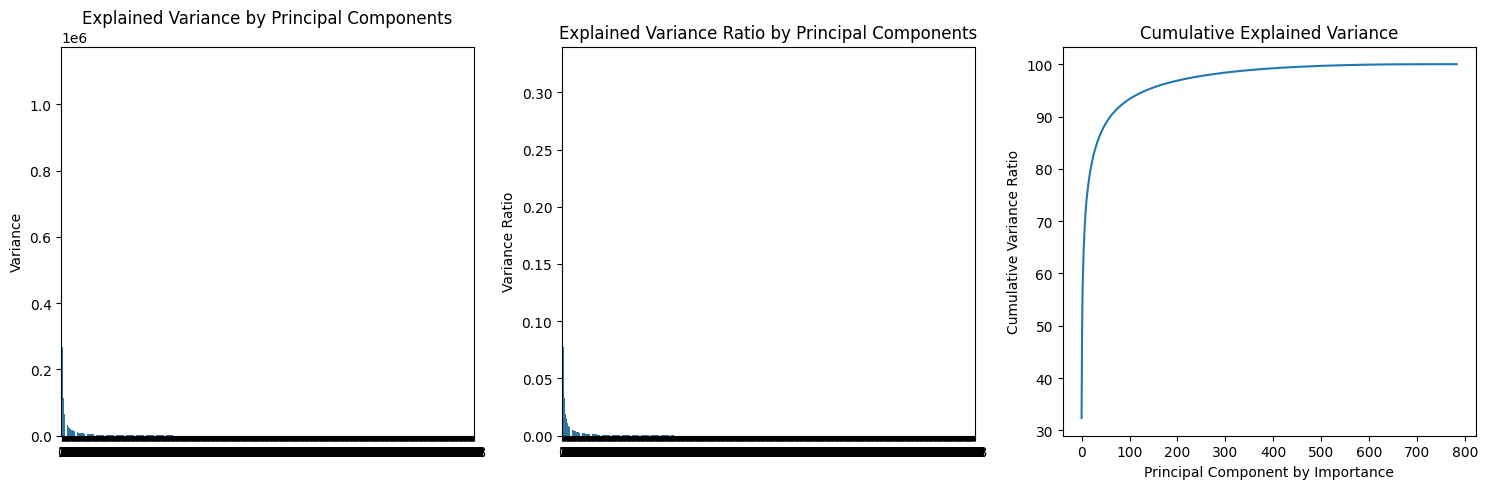

In [13]:
#This was the tester, look below for the actual image
#components = [f'PC{i+1}' for i in range(pcs.shape[1])]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(x=range(0, len(eigenvectors)), y=pca.explained_variance_, ax=axes[0])
axes[0].set_title('Explained Variance by Principal Components')
axes[0].set_ylabel('Variance')

sns.barplot(x=range(0, len(eigenvectors)), y=pca.explained_variance_ratio_, ax=axes[1])
axes[1].set_title('Explained Variance Ratio by Principal Components')
axes[1].set_ylabel('Variance Ratio')

sns.lineplot(x=range(0, len(eigenvectors)), y=np.cumsum(explained_variance_ratio), ax=axes[2])
axes[2].set_title('Cumulative Explained Variance')
axes[2].set_ylabel('Cumulative Variance Ratio')
axes[2].set_xlabel('Principal Component by Importance')

plt.tight_layout()
plt.show()

[Text(0.5, 0, 'Principal Component by Importance'),
 Text(0, 0.5, 'Cumulative Variance Ratio'),
 Text(0.5, 1.0, 'Cumulative Explained Variance')]

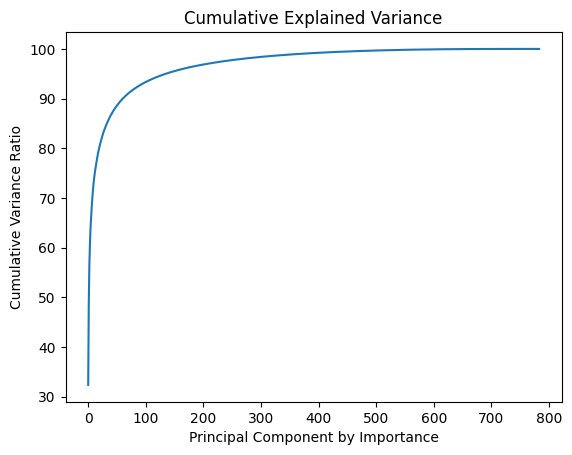

In [14]:
#This is actually good
CEV = sns.lineplot(x=range(0, len(eigenvectors)), y=np.cumsum(explained_variance_ratio))
CEV.set(xlabel = 'Principal Component by Importance', ylabel = 'Cumulative Variance Ratio', title = 'Cumulative Explained Variance')

In [15]:
cum_explained_variance = 0
no_of_components = 0
variance_threshold = 70
array_of_features = []

while cum_explained_variance <= variance_threshold:
    cum_explained_variance += explained_variance_ratio[no_of_components]
    no_of_components +=1
    print(f'{no_of_components} components cumulatively explain {cum_explained_variance}% of the variance')

for component in range(no_of_components):
    array_of_features.append(eigenvalues[component])

array_of_features



1 components cumulatively explain 32.37874530897989% of the variance
2 components cumulatively explain 48.63220561132991% of the variance
3 components cumulatively explain 56.41416903700371% of the variance
4 components cumulatively explain 60.55861212677085% of the variance
5 components cumulatively explain 63.82732950684069% of the variance
6 components cumulatively explain 66.07596669345469% of the variance
7 components cumulatively explain 68.00415110804234% of the variance
8 components cumulatively explain 69.78117732128102% of the variance
9 components cumulatively explain 71.29090146887873% of the variance


[1118271.8951989058,
 561349.3568822226,
 268767.3937131625,
 143137.54854647053,
 112892.41583016315,
 77661.68034905833,
 66594.13201523622,
 61373.54774971554,
 52141.6771295771]

In [16]:
# Assuming array_of_all_images contains your original flattened image data
 
# Fit PCA and transform the data to obtain the principal components
pca9 = PCA(n_components=9)  # Retain only the top 9 components
transformed9_images = pca9.fit_transform(array_of_all_images)
 
# transformed_images now holds the projection of each image onto the top 9 PCs
# Each row in transformed_images is a 1D array of the top 9 PCs for a single image
print("Shape of transformed data:", transformed9_images.shape)  # Should be (num_images, 9)
 
# Example: Accessing the top 9 PCs for the first image
first_image_top_9_pcs = transformed9_images[0]
print("Top 9 PCs for the first image:", first_image_top_9_pcs)
 
# Take a subset of 5 images from the transformed data
subset_size = 5
subset_indices = np.random.choice(transformed9_images.shape[0], subset_size, replace=False)
subset_top_9_pcs = transformed9_images[subset_indices]
 
# Display the shape and the subset of top 9 PCs
print("Shape of subset data:", subset_top_9_pcs.shape)  # Should be (5, 9)
print("Top 9 PCs for the subset of images:\n", subset_top_9_pcs)

Shape of transformed data: (10000, 9)
Top 9 PCs for the first image: [  90.81798916   90.68541093  785.67571621  379.65242666  -48.61024677
 -322.28702049   35.53268981  -17.12435198   92.72696939]
Shape of subset data: (5, 9)
Top 9 PCs for the subset of images:
 [[  512.98504524  -422.73559332   242.29287878  -799.88902279
    573.7184979    317.10638647   310.22330111   -32.38116498
     68.5995355 ]
 [ -150.24891233  -815.08204456  -137.50197452  -135.62576591
    -15.7115506   -513.15445285  -223.81269201   164.87779217
     89.61540503]
 [ -412.420663   -1303.90591224  -260.36056053  -259.82520199
   -437.45347417    96.73167461  -131.84642163   147.00854159
   -283.69760481]
 [-1010.10239979  -755.83587404  -684.53852984   470.70782533
    165.78147427   162.5378846    175.66087044  -176.02587459
     60.20767308]
 [-1430.22877329   246.973286    -129.25488712  -186.13442998
   -380.66671986  -358.85167403   188.43534317   210.57316264
     16.7256022 ]]


In [17]:
#back to the pca with no limitiation of no of components
pca_specified = pca.components_[770]

most = np.argmax(np.abs(pca_specified))

row, col = divmod(most, 28)

print(row)
print(col)
print(most)

27
27
783


In [18]:
X_train, X_validate, Y_train, Y_validate = train_test_split(transformed9_images, array_of_the_classes , test_size = 0.2, random_state = 43, stratify = array_of_the_classes) #I'm hoping that the stratify parameter keeps the balance of classes in the two splits

a=len(X_train)
b=len(X_validate)

print(f'Train size {a} Validate size {b}')
print(type(X_train))

Train size 8000 Validate size 2000
<class 'numpy.ndarray'>


In [ ]:
#export the data at this point for external use


np.save('..\\post_pca_data\\X_train', X_train)
np.save('..\\post_pca_data\\X_validate', X_validate)
np.save('..\\post_pca_data\\Y_train', Y_train)
np.save('..\\post_pca_data\\Y_validate', Y_validate)


In [ ]:
first_test_tree = DecisionTree(max_depth=10, min_samples_leaf=3, min_information_gain= 0.01, numb_of_features_splitting='sqrt')
first_test_tree.train(X_train, Y_train)

In [ ]:
#Should this be on the train data or the validate data?
train_preds = first_test_tree.predict(X_set = X_train)
print('Train size, correct prediction count, correct prediction ratio')
print(len(Y_train))
print(sum(train_preds == Y_train))
print(sum(train_preds == Y_train)/len(Y_train))


validate_preds = first_test_tree.predict(X_validate)
print('Validate size, correct prediction count, correct prediction ratio')
print(len(Y_validate))
print(sum(validate_preds == Y_validate))
print(sum(validate_preds == Y_validate)/len(Y_validate))

Train size, correct prediction count, correct prediction ratio
8000
6673
0.834125
Validate size, correct prediction count, correct prediction ratio
2000
1480
0.74


In [ ]:
best_score = -float('inf')
best_params = None
 
for max_depth in [5, 10, 15]:
    for min_samples_leaf in [3, 5, 10]:
        for min_information_gain in [0.01, 0.1]:
            for numb_of_features_splitting in ["sqrt", "log"]:  # Limited choices for faster search
                # Initialize model with optimized parameters
                model = DecisionTree(
                    max_depth=max_depth,
                    min_samples_leaf=min_samples_leaf,
                    min_information_gain=min_information_gain,
                    numb_of_features_splitting=numb_of_features_splitting
                )
                # Train and evaluate with current parameters
                model.train(X_train, y_train)
                y_pred = model.predict(X_train)  # Use a validation set if possible
                score = accuracy(y_train, y_pred)  # Or use y_val for external validation
 
                # Update best parameters if needed
                if score > best_score:
                    best_score = score
                    best_params = {
                        'max_depth': max_depth,
                        'min_samples_leaf': min_samples_leaf,
                        'min_information_gain': min_information_gain,
                        'numb_of_features_splitting': numb_of_features_splitting
                    }
 
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 15, 'min_samples_leaf': 3, 'min_information_gain': 0.01, 'numb_of_features_splitting': 'sqrt'}
Best Score: 0.916


# M2 FFNN

In [1]:
#network hyperparameters

n_features = X_train.shape[1]
n_hidden_1 = int(n_features * 0.7) 
n_hidden_2 = int(n_hidden_1 * 0.5)
n_outputs  = Y_train.shape[1]

topology   = [n_features, n_hidden_1, n_hidden_2, n_outputs]

#-- learning
learning_rate = 0.01
momentum = 0.1

print(topology)

NameError: name 'X_train' is not defined

# M3: Running library implementations of other machine learning models

# K Neigbours Classifier

In [68]:
#Initialise the machine
KNeNe = KNN(weights = 'distance', n_neighbors= 5, p=1 )
KNeNe.fit(X_train, Y_train)

#Get validation data predictions
KNNvalidate_predictions = KNeNe.predict(X_validate)

#Get percentage of correct predictions
KNNcorrect_pred_count = sum(KNNvalidate_predictions == Y_validate)
KNNratio_of_correct = KNNcorrect_pred_count/len(Y_validate)
print(f'Percentage of correct categorisations is', KNNratio_of_correct *100, '%')

Percentage of correct categorisations is 80.4 %


# Random Forest Classifier

In [72]:
#Initialise the machine
Rando = RFC(n_estimators= 100, criterion = 'entropy', max_depth = 100)
Rando.fit(X_train, Y_train)

#Get validation data predictions
RFCvalidate_predictions = Rando.predict(X_validate)

#Get percentage of correct predictions
RFCcorrect_pred_count = sum(RFCvalidate_predictions == Y_validate)
RFCratio_of_correct = RFCcorrect_pred_count/len(Y_validate)
print(f'Percentage of correct categorisations is', RFCratio_of_correct *100, '%')

Percentage of correct categorisations is 81.0 %


# Support Vector Classification

In [82]:
#Initialise the machine
SupVecMac = SVC(C=10, kernel = 'rbf')
SupVecMac.fit(X_train, Y_train)

#Get validation data predictions
SVCvalidate_predictions = SupVecMac.predict(X_validate)

#Get percentage of correct predictions
SVCcorrect_pred_count = sum(SVCvalidate_predictions == Y_validate)
SVCratio_of_correct = SVCcorrect_pred_count/len(Y_validate)
print(f'Percentage of correct categorisations is', SVCratio_of_correct *100, '%')

Percentage of correct categorisations is 83.05 %


# Logistic Regression

In [79]:
#Initialise the machine
LogReg = LR(C=1, multi_class = 'ovr', penalty = 'l2')
LogReg.fit(X_train, Y_train)

#Get validation data predictions
LRvalidate_predictions = LogReg.predict(X_validate)

#Get percentage of correct predictions
LRcorrect_pred_count = sum(LRvalidate_predictions == Y_validate)
LRratio_of_correct = LRcorrect_pred_count/len(Y_validate)
print(f'Percentage of correct categorisations is', LRratio_of_correct *100, '%')

Percentage of correct categorisations is 76.75 %


# Multi-Layer Perceptron (Pretty sure this is the dame as a Feed Forward Neural Network)

In [86]:
#Initialise the machine
MLP = MLPC(activation = 'relu', hidden_layer_sizes = [100])
MLP.fit(X_train, Y_train)

#Get validation data predictions
MLPvalidate_predictions = MLP.predict(X_validate)

#Get percentage of correct predictions
MLPcorrect_pred_count = sum(MLPvalidate_predictions == Y_validate)
MLPratio_of_correct = MLPcorrect_pred_count/len(Y_validate)
print(f'Percentage of correct categorisations is', MLPratio_of_correct *100, '%')

Percentage of correct categorisations is 77.3 %


# Convolutional Neural Network (from Tensorflow)

In [122]:
#Initialise the machine
CNN = models.Sequential()

#the convolutional base
CNN.add(layers.Conv2D(32, kernel_size=(3, 3), activation='sigmoid', input_shape=(28, 28, 1)))

CNN.add(layers.Conv2D(64, kernel_size=(3, 3), activation='sigmoid'))

CNN.add(layers.Conv2D(64, kernel_size=(3, 3), activation='sigmoid'))

CNN.summary()


c:\Users\luke0\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 22, 22, 64)     │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,744 (217.75 KB)

 Trainable params: 55,744 (217.75 KB)

 Non-trainable params: 0 (0.00 B)

In [123]:

#the dense on top
CNN.add(layers.Flatten())
CNN.add(layers.Dense(256, activation='sigmoid'))
CNN.add(layers.Dense(5, activation= 'softmax'))


In [142]:

#Compile model
CNN.compile(optimizer=SGD(learning_rate=0.01), loss= 'categorical_crossentropy', metrics=['accuracy'])


In [144]:
#whats's the shape
array_of_all_images.shape, array_of_the_classes.shape

((10000, 784), (10000,))

In [146]:
#perfrom train test split for this model, since it needs to be a little bit different (images need to be in their visible shape)
#hoepfully the fixed random state will keep the split the same
X_CNN_train, X_CNN_validate, Y_CNN_train, Y_CNN_validate = train_test_split(array_of_all_images, array_of_the_classes , test_size = 0.2, random_state = 43, stratify = array_of_the_classes) #I'm hoping that the stratify parameter keeps the balance of classes in the two splits


In [147]:
#reshape the data for this model
for _ in X_CNN_train:
    _.reshape (28,28)

for _ in X_CNN_validate:
    _.reshape (28,28)

X_train_CNN_reshaped = X_CNN_train.reshape(-1, 28,28)
X_validate_CNN_reshaped = X_CNN_validate.reshape(-1, 28,28)
X_train_CNN_reshaped.shape, X_validate_CNN_reshaped.shape

((8000, 28, 28), (2000, 28, 28))

In [148]:

#Train model and store validation data
history = CNN.fit(X_train_CNN_reshaped, Y_train, epochs= 1, validation_data = (X_validate_CNN_reshaped, Y_validate))


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(32,), output.shape=(32, 5)

In [ ]:

#Get validation data predictions
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


In [ ]:

test_loss, test_acc = CNN.evaluate(X_validate,  Y_validate, verbose=2)

#Get percentage of correct predictions
print(f'Percentage of correct categorisations is', test_acc *100, '%')